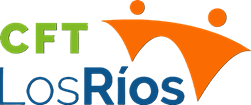
# Taller de Analítica
### Clase 1: Algoritmos de Predicción
#### Profesor: Diego Miranda Olavarría
#### Data Scientist

In [1]:
import pandas as pd

data = pd.read_csv('boston.csv')

data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [2]:
data.shape

(506, 14)

In [3]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Regresión Lineal Múltiple

In [6]:
from sklearn.linear_model import LinearRegression

X = data.drop('medv', axis=1) # variables independientes, axis 1 = columnas, axis 0  = filas
y = data['medv'] # variable dependiente

In [9]:
# Corroborar mi conjunto X
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [12]:
# Corroborar mi conjunto y
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [13]:
# Creamos el modelo de regresión lineal
model = LinearRegression()

# Luego ajustamos el modelo
model.fit(X,y)

LinearRegression()

In [18]:
# Arrojamos las predicciones
y_pred_lr = model.predict(X)
print(y_pred_lr)

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423 25.25628446
 23.00180827 19.53598843 11.52363685 18.92026211 18.99949651 21.58679568
 20.90652153 19.55290281 19.28348205 19.29748321 20.52750979 16.91140135
 16.17801106 18.40613603 12.52385753 17.67103669 15.83288129 13.80628535
 15.67833832 13.38668561 15.46397655 14.70847428 19.54737285 20.8764282
 11.45511759 18.05923295  8.81105736 14.28275814 13.70675891 23.81463526
 22.34193708 23.10891142 22.91502612 31.35762569 34.21510225 28.02056414
 25.20386628 24.60979273 22.94149176 22.09669817 20.42320032 18.03655088
  9.10655377 17.20607751 21.28152535 23.97222285 27.6558508  24.04901809
 15.3618477  31.15264947 24.85686978 33.10919806 21.77537987 21.08493555
 17.8725804  18.51110208 23.98742856 22.55408869 23.37308644 30.36148358
 25.53056512 21.11338564 17.42153786 20.78483633 25.20148859 21.7426577
 24.55744957 24.04295712 25.50499716 23.9669302  22.94545403 23.35699818
 21.26198266 22.42817373 28.40576968 26.99486086 26.0

In [19]:
# Crear una columna de predicciones para compararla con los valores reales
data['lr_pred'] = y_pred_lr
data.head(10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,lr_pred
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,30.003843
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,25.025562
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,30.567597
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,28.607036
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,27.943524
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7,25.256284
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9,23.001808
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1,19.535988
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5,11.523637
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9,18.920262


In [25]:
# Obteniendo el valor del intercepto (b0)
model.intercept_

36.45948838509025

In [29]:
# Obteniendo los valores de b1, b2, b3........

model.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [22]:
# Obteniendo la métrica del coeficiente de determinación
from sklearn.metrics import r2_score
r2 = r2_score(y, y_pred_lr)
print('El coeficiente de determinación es:',r2)

El coeficiente de determinación es: 0.7406426641094095


In [30]:
# Obteniendo la métrica del error cuadrático medio
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, y_pred_lr)
print('El error cuadrático medio es:',mse)

El error cuadrático medio es: 21.8948311817292


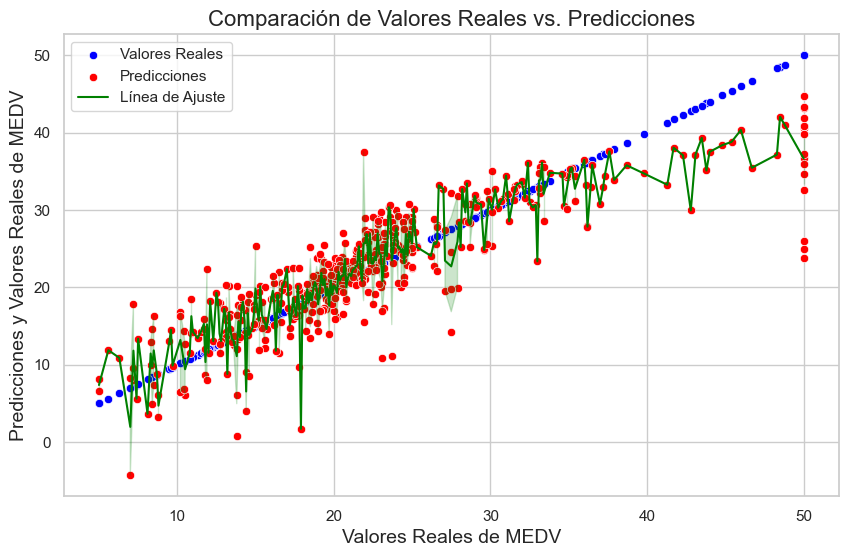

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='medv', y='medv', data=data, ax=ax, label='Valores Reales', color='blue')
sns.scatterplot(x='medv', y='lr_pred', data=data, ax=ax, label='Predicciones', color='red')
sns.lineplot(x='medv', y='lr_pred', data=data, ax=ax, color='green', label='Línea de Ajuste')
ax.set_title('Comparación de Valores Reales vs. Predicciones', fontsize=16)
ax.set_xlabel('Valores Reales de MEDV', fontsize=14)
ax.set_ylabel('Predicciones y Valores Reales de medv', fontsize=14)
ax.legend()

plt.show()

## Algoritmos de Machine Learning

In [35]:
# Dividir los datos en conjunto de entrenamiento (train) y prueba (test)

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.8, random_state=42)

### K-Nearest Neighbors

In [37]:
# Definir el modelo knn
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)

# Luego ajustamos el modelo con los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [42]:
# Realizar predicciones en el conjunto de prueba 
y_pred_knn = knn.predict(X_test)
y_pred_knn

array([24.54, 29.34, 14.6 , 28.  , 16.74, 31.88, 19.74, 16.06, 18.02,
       21.18, 23.38, 20.04, 12.42, 21.34, 23.7 , 22.22, 19.04, 14.06,
       35.14, 10.6 , 25.86, 29.34, 16.78, 21.08, 18.88, 22.78, 22.46,
       11.46, 23.38, 21.94, 22.68, 23.44, 10.3 , 30.04, 17.54, 21.12,
       21.66, 25.98, 22.52, 28.  , 21.18, 30.46, 38.16, 22.4 , 24.84,
       12.6 , 19.46, 28.  , 19.8 , 21.56, 22.44, 34.7 , 17.96, 21.18,
       30.36, 21.38, 12.5 , 35.14, 21.74, 21.12, 25.3 , 38.82, 29.1 ,
       14.3 , 30.46, 23.38, 12.26, 25.3 , 35.04, 13.36, 20.58, 22.52,
       17.66, 25.3 , 22.46,  8.98, 19.68, 38.16, 10.94, 14.08, 22.88,
       15.96, 24.32, 12.24, 21.46, 31.98, 14.16, 21.66, 26.04, 17.86,
       22.98, 14.7 , 17.48, 20.36, 24.76, 17.86, 30.16,  8.7 , 10.76,
       11.92, 21.8 , 22.46])

In [44]:
# Evaluar el rendimiento del modelo
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print('El error cudrático medio es:',mse_knn)
print('El coeficiente de determinación es:',r2_knn)

El error cudrático medio es: 25.860125490196076
El coeficiente de determinación es: 0.6473640882039258


## Decision Tree

In [46]:
# Definir el modelo decision tree
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)

dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [51]:
# Realizamos las predicciones
y_pred_dt = dt.predict(X_test)
y_pred_dt

array([28.1, 33.1, 17.3, 22. , 23.2, 18.5, 16.6, 16.6, 22.7, 22. , 20.5,
       27.1,  8.4, 21.4, 18.5, 23.9, 18.8, 10.5, 46. , 13. , 23.1, 24.4,
       13.6, 22. , 14.5, 11.7, 21. , 13.5, 19.4, 20.7, 18.8, 23.1, 10.4,
       16.2, 13.3, 13.1, 33.4, 18.5, 20.4, 24.8, 19.8, 28.4, 46. , 19.3,
       22. , 13. , 14.9, 24.1, 17.7, 32. , 21.7, 36.1, 16.7, 28.4, 43.1,
       18.5, 15.2, 22.8, 22. , 22.5, 24.5, 33. , 29.4, 19.3, 26.6, 14.4,
       13. , 22.9, 22.8, 14.1, 21.8, 28.7,  8.3, 18.6, 21.5, 10.5, 19.8,
       50. , 13.3,  8.1, 21.2, 16.3, 19.4, 10.5, 14.5, 29.9, 14.8, 23.1,
       22.9, 18. , 23.3,  8.8, 19.2, 17.6, 16.2, 19.3, 50. , 16.3, 11.7,
       16.3, 19. , 26.4])

In [49]:
# Evaluar el rendimiento del modelo
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print('El error cuadrático medio es:',mse_dt)
print('El coeficiente de determinación es:',r2_dt)

El error cuadrático medio es: 10.416078431372549
El coeficiente de determinación es: 0.8579634380978161


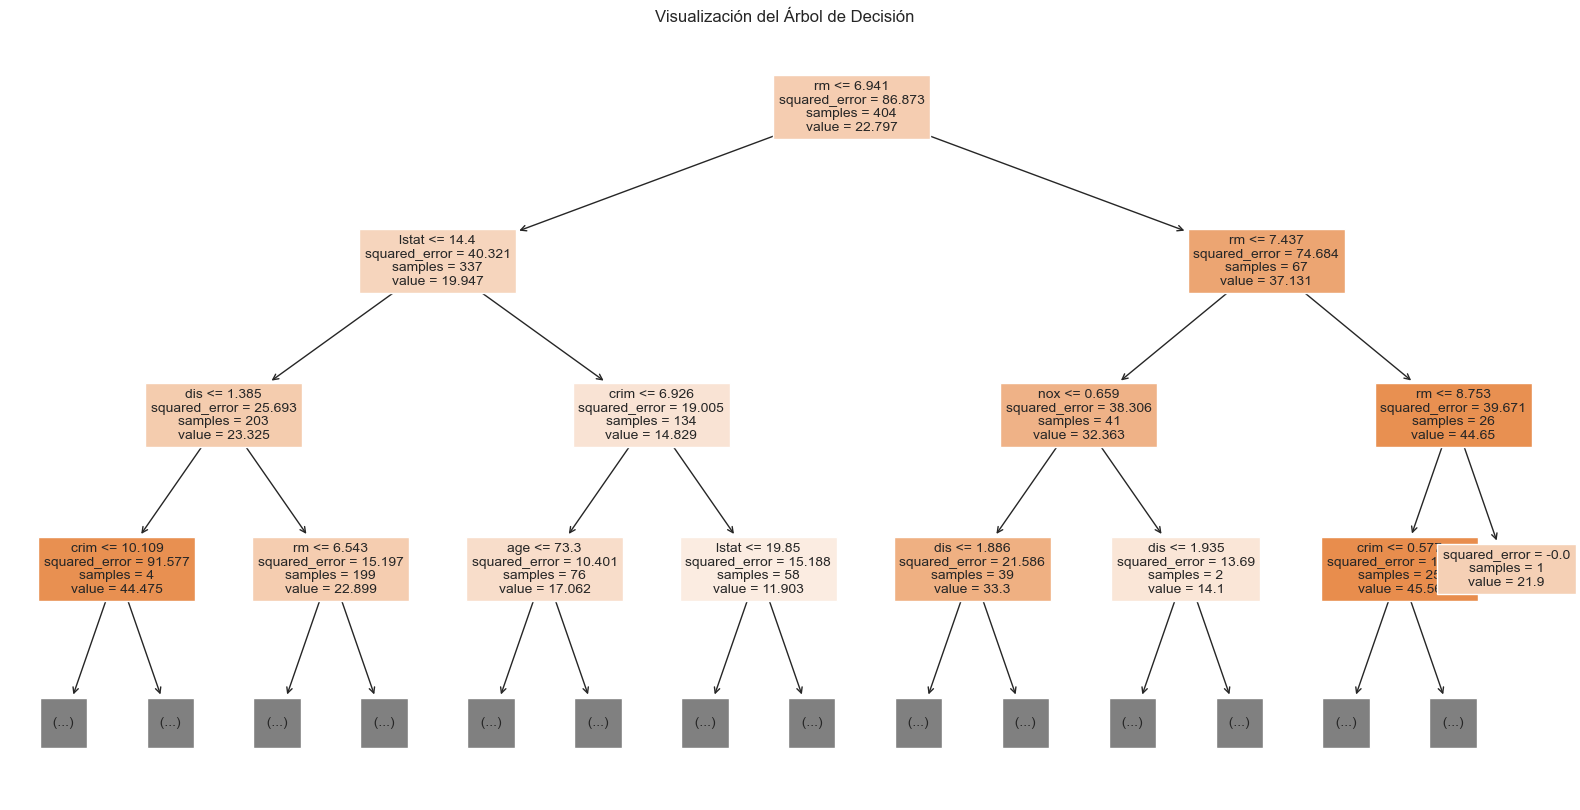

In [53]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(dt, filled=True, feature_names=list(X_train.columns), max_depth=3, fontsize=10)
plt.title("Árbol de Decisión")
plt.show()
